In [1]:
import numpy as np 
import pandas as pd
import re
import ast

## Combined Pangenome Matrix (600)

In [2]:
data_path = "/Users/921623492/Ecoli_Project/Experiment/results/combined_pangenome_matrix.csv"

In [3]:
df = pd.read_csv(
    data_path,
    index_col="Sample_ID")

In [4]:
df.head()

,FAHFDEJI_02221,GNOIHJGF_04610,NHLJOMBL_05016,KCNLHOEA_03403,HHCOCAHC_02102,KMKPFFJF_01017,MAOGMHBA_04903,CKMBOFAF_03765,FAHFDEJI_00308,ECKICHIN_03110,...,NHLJOMBL_00571,GHOPNDEC_03154,AEGEGBCH_03641,DMMNDODG_04815,EDEFNFDI_05015,EDEFNFDI_05016,BPDJECED_04485,DMLEFFEM_04762,EDHNABJO_03523,LBOLKHKO_00606
Sample_ID,,,,,,,,,,,,,,,,,,,,,
mills_cip_200__GCA_025783615,['a' 't' 'g' 't' 'c' 't' 'a' 't' 'a' 'c' 'a' '...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan ... nan nan nan],[nan nan nan nan nan nan nan nan nan nan nan n...,['a' 't' 'g' 'a' 'g' 't' 'a' 'a' 'g' 'a' 't' '...,[nan nan nan ... nan nan nan],...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,['a' 't' 'g' ... 't' 'g' 'a'],['a' 't' 'g' ... 't' 'g' 'a'],[nan nan nan nan nan nan nan nan nan nan nan n...,['a' 't' 'g' 't' 'c' 'c' 'c' 'a' 'g' 'a' 't' '...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...
kallonen_cip_200__ERR434265_pangenome_alignment,['a' 't' 'g' 't' 'c' 't' 'a' 't' 'a' 'c' 'a' '...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan ... nan nan nan],[nan nan nan nan nan nan nan nan nan nan nan n...,['a' 't' 'g' 'a' 'g' 't' 'a' 'a' 'g' 'a' 't' '...,['a' 't' 'g' ... 't' 'a' 'a'],...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,['a' 't' 'g' ... 't' 'g' 'a'],['a' 't' 'g' ... 't' 'g' 'a'],[nan nan nan nan nan nan nan nan nan nan nan n...,['a' 't' 'g' 't' 'c' 'c' 'c' 'a' 'g' 'a' 't' '...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...
kallonen_cip_200__ERR439575_pangenome_alignment,['a' 't' 'g' 't' 'c' 't' 'a' 't' 'a' 'c' 'a' '...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan ... nan nan nan],[nan nan nan nan nan nan nan nan nan nan nan n...,['a' 't' 'g' 'a' 'g' 't' 'a' 'a' 'g' 'a' 't' '...,['a' 't' 'g' ... 't' 'a' 'a'],...,['-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,['a' 't' 'g' ... 't' 'g' 'a'],['a' 't' 'g' ... 't' 'g' 'a'],['-' '-' '-' '-' '-' '-' 'c' 't' 'g' 't' 'a' '...,['a' 't' 'g' 't' 'c' 'c' 'c' 'a' 'g' 'a' 't' '...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...
gladstone-cip-200__ERR4036619_pangenome_alignment,['a' 't' 'g' 't' 'c' 't' 'a' 't' 'a' 'c' 'a' '...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,['a' 't' 'g' ... 't' 'g' 'a'],[nan nan nan nan nan nan nan nan nan nan nan n...,['a' 't' 'g' 'a' 'g' 't' 'a' 'a' 'g' 'a' 't' '...,['a' 't' 'g' ... 't' 'a' 'a'],...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan ... nan nan nan],[nan nan nan ... nan nan nan],[nan nan nan nan nan nan nan nan nan nan na

In [5]:
df.shape

(600, 15629)

## Extracting Accession Numbers 

In [6]:

def extract_accession(sample_id):
    match = re.search(r'(GCA_\d+|ERR\d+|SRR\d+)', sample_id)
    return match.group(0) if match else sample_id  # fallback if no match

# Replace the current index with accession numbers
df.index = df.index.to_series().apply(extract_accession)

In [7]:
df.head()

,FAHFDEJI_02221,GNOIHJGF_04610,NHLJOMBL_05016,KCNLHOEA_03403,HHCOCAHC_02102,KMKPFFJF_01017,MAOGMHBA_04903,CKMBOFAF_03765,FAHFDEJI_00308,ECKICHIN_03110,...,NHLJOMBL_00571,GHOPNDEC_03154,AEGEGBCH_03641,DMMNDODG_04815,EDEFNFDI_05015,EDEFNFDI_05016,BPDJECED_04485,DMLEFFEM_04762,EDHNABJO_03523,LBOLKHKO_00606
Sample_ID,,,,,,,,,,,,,,,,,,,,,
GCA_025783615,['a' 't' 'g' 't' 'c' 't' 'a' 't' 'a' 'c' 'a' '...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan ... nan nan nan],[nan nan nan nan nan nan nan nan nan nan nan n...,['a' 't' 'g' 'a' 'g' 't' 'a' 'a' 'g' 'a' 't' '...,[nan nan nan ... nan nan nan],...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,['a' 't' 'g' ... 't' 'g' 'a'],['a' 't' 'g' ... 't' 'g' 'a'],[nan nan nan nan nan nan nan nan nan nan nan n...,['a' 't' 'g' 't' 'c' 'c' 'c' 'a' 'g' 'a' 't' '...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...
ERR434265,['a' 't' 'g' 't' 'c' 't' 'a' 't' 'a' 'c' 'a' '...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan ... nan nan nan],[nan nan nan nan nan nan nan nan nan nan nan n...,['a' 't' 'g' 'a' 'g' 't' 'a' 'a' 'g' 'a' 't' '...,['a' 't' 'g' ... 't' 'a' 'a'],...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,['a' 't' 'g' ... 't' 'g' 'a'],['a' 't' 'g' ... 't' 'g' 'a'],[nan nan nan nan nan nan nan nan nan nan nan n...,['a' 't' 'g' 't' 'c' 'c' 'c' 'a' 'g' 'a' 't' '...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...
ERR439575,['a' 't' 'g' 't' 'c' 't' 'a' 't' 'a' 'c' 'a' '...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan ... nan nan nan],[nan nan nan nan nan nan nan nan nan nan nan n...,['a' 't' 'g' 'a' 'g' 't' 'a' 'a' 'g' 'a' 't' '...,['a' 't' 'g' ... 't' 'a' 'a'],...,['-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,['a' 't' 'g' ... 't' 'g' 'a'],['a' 't' 'g' ... 't' 'g' 'a'],['-' '-' '-' '-' '-' '-' 'c' 't' 'g' 't' 'a' '...,['a' 't' 'g' 't' 'c' 'c' 'c' 'a' 'g' 'a' 't' '...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...
ERR4036619,['a' 't' 'g' 't' 'c' 't' 'a' 't' 'a' 'c' 'a' '...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,['a' 't' 'g' ... 't' 'g' 'a'],[nan nan nan nan nan nan nan nan nan nan nan n...,['a' 't' 'g' 'a' 'g' 't' 'a' 'a' 'g' 'a' 't' '...,['a' 't' 'g' ... 't' 'a' 'a'],...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan ... nan nan nan],[nan nan nan ... nan nan nan],[nan nan nan nan nan nan nan nan nan nan nan n...,['a' 't' 'g' 't' 'c' 'c' 'c' 'a' 'g' 'a' 't' '...,['a' 't' 'g' 'c' 'g' 'g' 'c' 't' 't' 'g' 'c' '...,['a' 't' 'g' 'c' 'a' 'g

#  Pre-BLAST EDA Checklist for Gene Presence Data

In [30]:
df.head()

,FAHFDEJI_02221,GNOIHJGF_04610,NHLJOMBL_05016,KCNLHOEA_03403,HHCOCAHC_02102,KMKPFFJF_01017,MAOGMHBA_04903,CKMBOFAF_03765,FAHFDEJI_00308,ECKICHIN_03110,...,NHLJOMBL_00571,GHOPNDEC_03154,AEGEGBCH_03641,DMMNDODG_04815,EDEFNFDI_05015,EDEFNFDI_05016,BPDJECED_04485,DMLEFFEM_04762,EDHNABJO_03523,LBOLKHKO_00606
Sample_ID,,,,,,,,,,,,,,,,,,,,,
GCA_025783615,['a' 't' 'g' 't' 'c' 't' 'a' 't' 'a' 'c' 'a' '...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan ... nan nan nan],[nan nan nan nan nan nan nan nan nan nan nan n...,['a' 't' 'g' 'a' 'g' 't' 'a' 'a' 'g' 'a' 't' '...,[nan nan nan ... nan nan nan],...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,['a' 't' 'g' ... 't' 'g' 'a'],['a' 't' 'g' ... 't' 'g' 'a'],[nan nan nan nan nan nan nan nan nan nan nan n...,['a' 't' 'g' 't' 'c' 'c' 'c' 'a' 'g' 'a' 't' '...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...
ERR434265,['a' 't' 'g' 't' 'c' 't' 'a' 't' 'a' 'c' 'a' '...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan ... nan nan nan],[nan nan nan nan nan nan nan nan nan nan nan n...,['a' 't' 'g' 'a' 'g' 't' 'a' 'a' 'g' 'a' 't' '...,['a' 't' 'g' ... 't' 'a' 'a'],...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,['a' 't' 'g' ... 't' 'g' 'a'],['a' 't' 'g' ... 't' 'g' 'a'],[nan nan nan nan nan nan nan nan nan nan nan n...,['a' 't' 'g' 't' 'c' 'c' 'c' 'a' 'g' 'a' 't' '...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...
ERR439575,['a' 't' 'g' 't' 'c' 't' 'a' 't' 'a' 'c' 'a' '...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan ... nan nan nan],[nan nan nan nan nan nan nan nan nan nan nan n...,['a' 't' 'g' 'a' 'g' 't' 'a' 'a' 'g' 'a' 't' '...,['a' 't' 'g' ... 't' 'a' 'a'],...,['-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,['a' 't' 'g' ... 't' 'g' 'a'],['a' 't' 'g' ... 't' 'g' 'a'],['-' '-' '-' '-' '-' '-' 'c' 't' 'g' 't' 'a' '...,['a' 't' 'g' 't' 'c' 'c' 'c' 'a' 'g' 'a' 't' '...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...
ERR4036619,['a' 't' 'g' 't' 'c' 't' 'a' 't' 'a' 'c' 'a' '...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,['a' 't' 'g' ... 't' 'g' 'a'],[nan nan nan nan nan nan nan nan nan nan nan n...,['a' 't' 'g' 'a' 'g' 't' 'a' 'a' 'g' 'a' 't' '...,['a' 't' 'g' ... 't' 'a' 'a'],...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan ... nan nan nan],[nan nan nan ... nan nan nan],[nan nan nan nan nan nan nan nan nan nan nan n...,['a' 't' 'g' 't' 'c' 'c' 'c' 'a' 'g' 'a' 't' '...,['a' 't' 'g' 'c' 'g' 'g' 'c' 't' 't' 'g' 'c' '...,['a' 't' 'g' 'c' 'a' 'g

### Step 1: Clean "fake NaNs"

In [8]:

# Function to check if the string contains mostly 'nan'
def fake_nan(cell):
    if isinstance(cell, str):
        stripped = cell.replace(" ", "")
        return stripped.startswith("nannan") or "nannan" in stripped
    return False


In [9]:
# Apply to entire DataFrame and replace those with np.nan
df_cleaned = df.applymap(lambda x: np.nan if fake_nan(x) else x)

/tmp/ipykernel_1404573/2113749646.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned = df.applymap(lambda x: np.nan if fake_nan(x) else x)


In [10]:
df_cleaned.head()

,FAHFDEJI_02221,GNOIHJGF_04610,NHLJOMBL_05016,KCNLHOEA_03403,HHCOCAHC_02102,KMKPFFJF_01017,MAOGMHBA_04903,CKMBOFAF_03765,FAHFDEJI_00308,ECKICHIN_03110,...,NHLJOMBL_00571,GHOPNDEC_03154,AEGEGBCH_03641,DMMNDODG_04815,EDEFNFDI_05015,EDEFNFDI_05016,BPDJECED_04485,DMLEFFEM_04762,EDHNABJO_03523,LBOLKHKO_00606
Sample_ID,,,,,,,,,,,,,,,,,,,,,
GCA_025783615,['a' 't' 'g' 't' 'c' 't' 'a' 't' 'a' 'c' 'a' '...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['a' 't' 'g' 'a' 'g' 't' 'a' 'a' 'g' 'a' 't' '...,NaN,...,NaN,NaN,NaN,['a' 't' 'g' ... 't' 'g' 'a'],['a' 't' 'g' ... 't' 'g' 'a'],NaN,['a' 't' 'g' 't' 'c' 'c' 'c' 'a' 'g' 'a' 't' '...,NaN,NaN,NaN
ERR434265,['a' 't' 'g' 't' 'c' 't' 'a' 't' 'a' 'c' 'a' '...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['a' 't' 'g' 'a' 'g' 't' 'a' 'a' 'g' 'a' 't' '...,['a' 't' 'g' ... 't' 'a' 'a'],...,NaN,NaN,NaN,['a' 't' 'g' ... 't' 'g' 'a'],['a' 't' 'g' ... 't' 'g' 'a'],NaN,['a' 't' 'g' 't' 'c' 'c' 'c' 'a' 'g' 'a' 't' '...,NaN,NaN,NaN
ERR439575,['a' 't' 'g' 't' 'c' 't' 'a' 't' 'a' 'c' 'a' '...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['a' 't' 'g' 'a' 'g' 't' 'a' 'a' 'g' 'a' 't' '...,['a' 't' 'g' ... 't' 'a' 'a'],...,['-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '...,NaN,NaN,['a' 't' 'g' ... 't' 'g' 'a'],['a' 't' 'g' ... 't' 'g' 'a'],['-' '-' '-' '-' '-' '-' 'c' 't' 'g' 't' 'a' '...,['a' 't' 'g' 't' 'c' 'c' 'c' 'a' 'g' 'a' 't' '...,NaN,NaN,NaN
ERR4036619,['a' 't' 'g' 't' 'c' 't' 'a' 't' 'a' 'c' 'a' '...,NaN,NaN,NaN,NaN,NaN,['a' 't' 'g' ... 't' 'g' 'a'],NaN,['a' 't' 'g' 'a' 'g' 't' 'a' 'a' 'g' 'a' 't' '...,['a' 't' 'g' ... 't' 'a' 'a'],...,NaN,NaN,NaN,NaN,NaN,NaN,['a' 't' 'g' 't' 'c' 'c' 'c' 'a' 'g' 'a' 't' '...,['a' 't' 'g' 'c' 'g' 'g' 'c' 't' 't' 'g' 'c' '...,['a' 't' 'g' 'c' 'a' 'g' 't' 't' 't' 'g' 't' '...,['a' 't' 'g' 't' 'c' 'g' 'g' 'c' 'c' 'a' 'c' '...
ERR435151,['a' 't' 'g' 't' 'c' 't' 'a' 't' 'a' 'c' 'a' '...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['a' 't' 'g' 'a' 'g' 't' 'a' 'a' 'g' 'a' 't' '...,['a' 't' 'g' ... 't' 'a' 'a'],...,NaN,NaN,NaN,['a' 't' 'g' ... 't' 'g' 'a'],['a' 't' 'g' ... 't' 'g' 'a'],NaN,['a' 't' 'g' 't' 'c' 'c' 'c' 'a' 'g' 'a' 't' '...,NaN,NaN,NaN


In [38]:
df_cleaned.tail()

,FAHFDEJI_02221,GNOIHJGF_04610,NHLJOMBL_05016,KCNLHOEA_03403,HHCOCAHC_02102,KMKPFFJF_01017,MAOGMHBA_04903,CKMBOFAF_03765,FAHFDEJI_00308,ECKICHIN_03110,...,NHLJOMBL_00571,GHOPNDEC_03154,AEGEGBCH_03641,DMMNDODG_04815,EDEFNFDI_05015,EDEFNFDI_05016,BPDJECED_04485,DMLEFFEM_04762,EDHNABJO_03523,LBOLKHKO_00606
Sample_ID,,,,,,,,,,,,,,,,,,,,,
ERR4034483,['a' 't' 'g' 't' 'c' 't' 'a' 't' 'a' 'c' 'a' '...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['a' 't' 'g' 'a' 'g' 't' 'a' 'a' 'g' 'a' 't' '...,NaN,...,NaN,NaN,['a' 't' 'g' 'a' 'a' 'a' 'a' 'c' 'a' 'a' 'a' '...,['a' 't' 'g' ... 't' 'g' 'a'],['a' 't' 'g' ... 't' 'g' 'a'],NaN,['a' 't' 'g' 't' 'c' 'c' 'c' 'a' 'g' 'a' 't' '...,['a' 't' 'g' 'c' 'g' 'g' 'c' 't' 't' 'g' 'c' '...,['a' 't' 'g' 'c' 'a' 'g' 't' 't' 't' 'g' 't' '...,['a' 't' 'g' 't' 'c' 'g' 'g' 'c' 'c' 'a' 'c' '...
ERR434535,['a' 't' 'g' 't' 'c' 't' 'a' 't' 'a' 'c' 'a' '...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['a' 't' 'g' 'a' 'g' 't' 'a' 'a' 'g' 'a' 't' '...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,['a' 't' 'g' 't' 'c' 'c' 'c' 'a' 'g' 'a' 't' '...,['a' 't' 'g' 'c' 'g' 'g' 'c' 't' 't' 'g' 'c' '...,['a' 't' 'g' 'c' 'a' 'g' 't' 't' 't' 'g' 't' '...,['a' 't' 'g' 't' 'c' 'g' 'g' 'c' 'c' 'a' 'c' '...
ERR4035923,['a' 't' 'g' 't' 'c' 't' 'a' 't' 'a' 'c' 'a' '...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['a' 't' 'g' 'a' 'g' 't' 'a' 'a' 'g' 'a' 't' '...,NaN,...,['-' '-' 'g' 'a' 't' 'g' 'a' 'a' 'a' 'a' 'a' '...,NaN,NaN,NaN,NaN,['g' 't' 'g' 'g' 'c' 'g' 'c' 't' 'g' 't' 'a' '...,['a' 't' 'g' 't' 'c' 'c' 'c' 'a' 'g' 'a' 't' '...,NaN,NaN,NaN
GCA_023858765,['a' 't' 'g' 't' 'c' 't' 'a' 't' 'a' 'c' 'a' '...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['a' 't' 'g' 'a' 'g' 't' 'a' 'a' 'g' 'a' 't' '...,['a' 't' 'g' ... 't' 'a' 'a'],...,NaN,NaN,NaN,['a' 't' 'g' ... 't' 'g' 'a'],['a' 't' 'g' ... 't' 'g' 'a'],NaN,['a' 't' 'g' 't' 'c' 'c' 'c' 'a' 'g' 'a' 't' '...,NaN,NaN,NaN
ERR4034123,['a' 't' 'g' 't' 'c' 't' 'a' 't' 'a' 'c' 'a' '...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['a' 't' 'g' 'a' 'g' 't' 'a' 'a' 'g' 'a' 't' '...,['a' 't' 'g' ... 't' 'a' 'a'],...,NaN,['-' 't' 'g' 't' 't' 'a' 'g' 'c' 'g' 'a' 'a' '...,NaN,NaN,NaN,NaN,['a' 't' 'g' 't' 'c' 'c' 'c' 'a' 'g' 'a' 't' '...,NaN,NaN,NaN


### Step 2: Create Presence/Absence Matrix
- 1 → the gene is present (has sequence data)

- 0 → the gene is absent (no usable sequence)

In [11]:
presence_absence = df_cleaned.notna().astype(int)

In [12]:
presence_absence.tail()

,FAHFDEJI_02221,GNOIHJGF_04610,NHLJOMBL_05016,KCNLHOEA_03403,HHCOCAHC_02102,KMKPFFJF_01017,MAOGMHBA_04903,CKMBOFAF_03765,FAHFDEJI_00308,ECKICHIN_03110,...,NHLJOMBL_00571,GHOPNDEC_03154,AEGEGBCH_03641,DMMNDODG_04815,EDEFNFDI_05015,EDEFNFDI_05016,BPDJECED_04485,DMLEFFEM_04762,EDHNABJO_03523,LBOLKHKO_00606
Sample_ID,,,,,,,,,,,,,,,,,,,,,
ERR4034483,1,0,0,0,0,0,0,0,1,0,...,0,0,1,1,1,0,1,1,1,1
ERR434535,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,1,1
ERR4035923,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,1,0,0,0
GCA_023858765,1,0,0,0,0,0,0,0,1,1,...,0,0,0,1,1,0,1,0,0,0
ERR4034123,1,0,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,0


In [17]:
presence_absence['GNOIHJGF_04610'].value_counts()


GNOIHJGF_04610
0    526
1     74
Name: count, dtype: int64

In [19]:
presence_absence.value_counts()


FAHFDEJI_02221  GNOIHJGF_04610  NHLJOMBL_05016  KCNLHOEA_03403  HHCOCAHC_02102  KMKPFFJF_01017  MAOGMHBA_04903  CKMBOFAF_03765  FAHFDEJI_00308  ECKICHIN_03110  LEHNLCKJ_00809  FAHFDEJI_00089  KJLMLENO_03051  JCLAJFHL_00807  FAHFDEJI_04189  NHLJOMBL_04207  FAHFDEJI_03463  FAHFDEJI_01510  CCLOLLAI_02588  BMGGFMOG_04510  FAHFDEJI_02320  HHCOCAHC_04408  MBLHFCLM_04575  ECEKIEBB_02714  GGCFHFNC_04315  FAHFDEJI_02842  LBBEEGIA_01735  FAHFDEJI_04673  CIJLOFPK_01464  HDMNBMHC_04527  GNOIHJGF_00772  BDDJHFKL_00350  KPGCBOBD_04099  DEKJOKLN_02864  DMMNDODG_01424  LBOLKHKO_04632  FAPIANAB_04420  HIFCHAPL_04329  FAHFDEJI_02583  FAHFDEJI_01155  GNOIHJGF_04607  KCNLHOEA_03389  NJKFMCMP_04041  FAHFDEJI_02308  DFNCLILH_00546  FAHFDEJI_02188  GLAHOLOE_04559  HGABHIGH_04461  CCFFEEOJ_03398  EDHNABJO_00003  GGCADGEP_04931  FAHFDEJI_01202  HOMEFLBK_04276  BPDJECED_04155  IFJNIGND_04696  PPEGJJEH_04648  FAHFDEJI_00722  FAHFDEJI_03911  FAHFDEJI_02486  MBLHFCLM_04583  FAHFDEJI_01509  NDKKDBMA_01971  BMGGFMOG

### Step 3: Explore Gene Distribution
- Genes present in all samples

- Genes present in few or no samples

In [20]:
gene_presence_counts = presence_absence.sum(axis=0)  # columns = genes
gene_absence_counts = (presence_absence == 0).sum(axis=0)

In [21]:
gene_presence_counts

FAHFDEJI_02221    600
GNOIHJGF_04610     74
NHLJOMBL_05016      0
KCNLHOEA_03403      0
HHCOCAHC_02102      2
                 ... 
EDEFNFDI_05016    244
BPDJECED_04485    600
DMLEFFEM_04762    191
EDHNABJO_03523    191
LBOLKHKO_00606    191
Length: 15629, dtype: int64

In [22]:
gene_absence_counts

FAHFDEJI_02221      0
GNOIHJGF_04610    526
NHLJOMBL_05016    600
KCNLHOEA_03403    600
HHCOCAHC_02102    598
                 ... 
EDEFNFDI_05016    356
BPDJECED_04485      0
DMLEFFEM_04762    409
EDHNABJO_03523    409
LBOLKHKO_00606    409
Length: 15629, dtype: int64

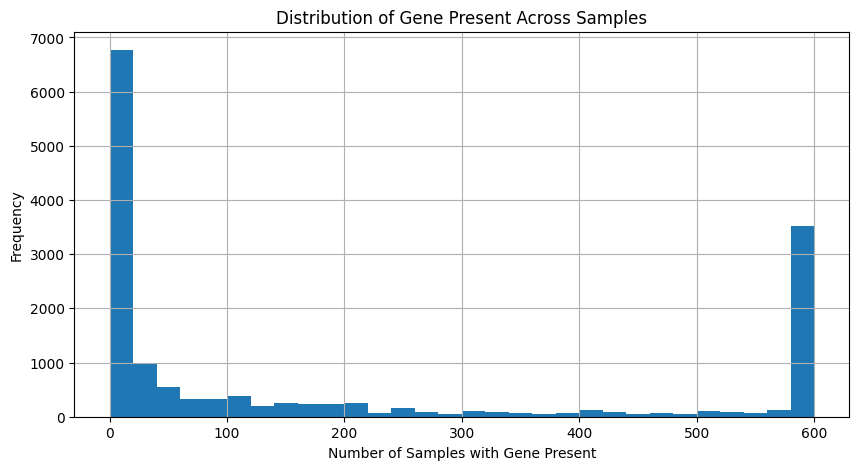

In [43]:
gene_presence_counts.plot.hist(
    bins=30,
    title="Distribution of Gene Present Across Samples",
    xlabel="Number of Samples with Gene Present",
    figsize=(10, 5)
)
plt.grid(True)
plt.show()

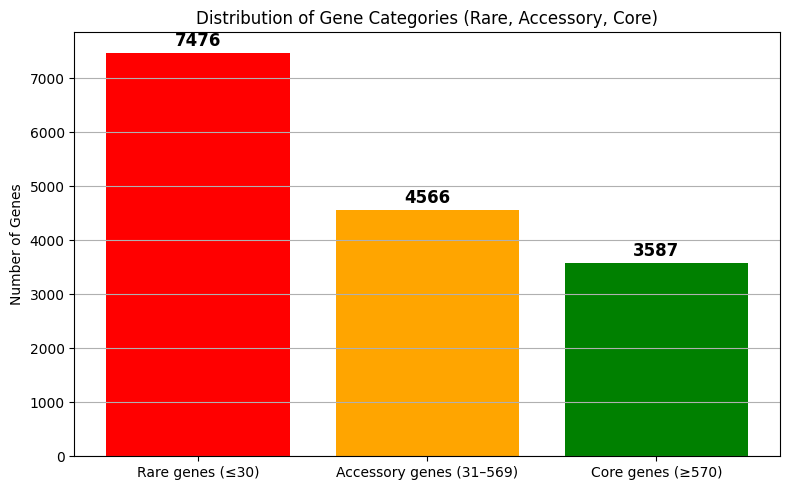

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# STEP 1: Classify each gene by presence count
def classify_gene(presence_count):
    if presence_count <= 30:
        return "Rare genes (≤30)"
    elif presence_count >= 570:
        return "Core genes (≥570)"
    else:
        return "Accessory genes (31–569)"

# Apply classification
gene_categories = gene_presence_counts.apply(classify_gene)

# STEP 2: Count how many genes fall into each category
category_counts = gene_categories.value_counts().reindex(
    ["Rare genes (≤30)", "Accessory genes (31–569)", "Core genes (≥570)"]
)

# STEP 3: Plot it as a clean bar chart
colors = ["red", "orange", "green"]

plt.figure(figsize=(8, 5))
bars = plt.bar(category_counts.index, category_counts.values, color=colors)

# Add count labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 50, int(yval),
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title("Distribution of Gene Categories (Rare, Accessory, Core)")
plt.ylabel("Number of Genes")
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


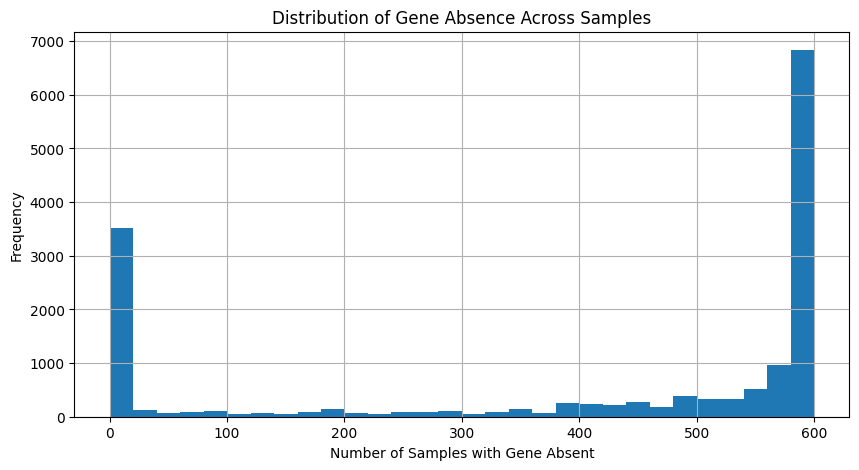

In [25]:
gene_absence_counts.plot.hist(
    bins=30,
    title="Distribution of Gene Absence Across Samples",
    xlabel="Number of Samples with Gene Absent",
    figsize=(10, 5)
)
plt.grid(True)
plt.show()


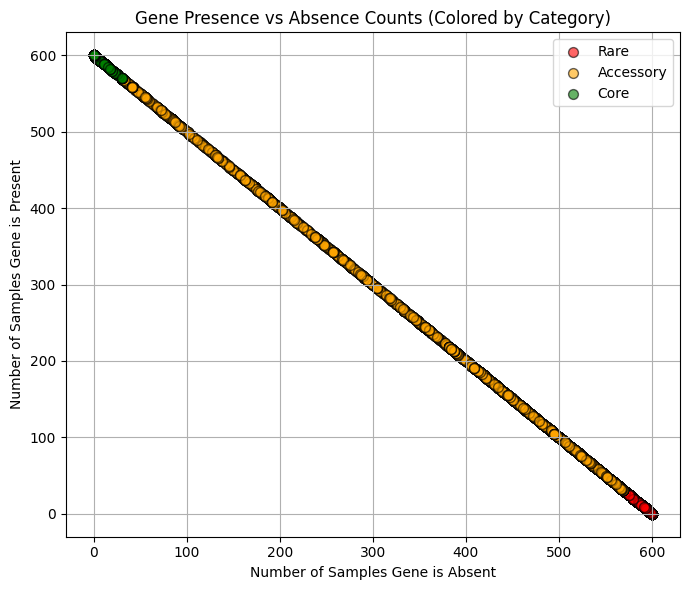

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a dataframe with presence and absence counts
gene_summary = pd.DataFrame({
    "Presence": gene_presence_counts,
    "Absence": gene_absence_counts
})

# Define categories
def classify(p):
    if p <= 30:
        return "Rare"
    elif p >= 570:
        return "Core"
    else:
        return "Accessory"

# Apply classification
gene_summary["Category"] = gene_summary["Presence"].apply(classify)

# Plot with color based on category
colors = {"Rare": "red", "Accessory": "orange", "Core": "green"}

plt.figure(figsize=(7, 6))
for category, color in colors.items():
    subset = gene_summary[gene_summary["Category"] == category]
    plt.scatter(
        subset["Absence"],
        subset["Presence"],
        label=category,
        color=color,
        alpha=0.6,
        edgecolor='k',
        s=50
    )

plt.title("Gene Presence vs Absence Counts (Colored by Category)")
plt.xlabel("Number of Samples Gene is Absent")
plt.ylabel("Number of Samples Gene is Present")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [44]:
gene_id = "FAHFDEJI_02221"
gene_id

'FAHFDEJI_02221'

In [45]:
char_Array = df_cleaned["FAHFDEJI_02221"].dropna().iloc[0]
char_Array

"['a' 't' 'g' 't' 'c' 't' 'a' 't' 'a' 'c' 'a' 'g' 'a' 'a' 'c' 'g' 'a' 'a'\n 'a' 't' 'g' 'c' 'c' 't' 'g' 'g' 't' 't' 'a' 'c' 'a' 'a' 'c' 'g' 'a' 'a'\n 'a' 't' 'g' 'a' 'a' 'c' 'c' 'a' 'g' 't' 'a' 't' 'c' 't' 'g' 'a' 'a' 'c'\n 'c' 'a' 'a' 'c' 'a' 'a' 'g' 'g' 'g' 'a' 'c' 'g' 'g' 'g' 't' 'c' 't' 'g'\n 'a' 'c' 'c' 'c' 'c' 't' 'g' 'c' 't' 'g' 'a' 'g' 'a' 't' 'g' 'c' 'a' 't'\n 'g' 'g' 't' 't' 't' 'a' 'a' 't' 'c' 'a' 'g' 't' 'g' 'g' 'g' 'a' 't' 'g'\n 'a' 't' 'a' 't' 'g' 't' 'g' 'g' 'c' 'g' 'g' 't' 'a' 'a' 'c' 'g' 'a' 't'\n 'g' 'a' 'c' 'a' 'g' 'c' 't' 'c' 'a' 't' 'g' 'g' 'c' 't' 'g' 'c' 'c' 'g'\n 'c' 't' 'a' 'c' 't' 't' 'c' 'a' 'c' 'g' 'a' 'c' 'c' 't' 'g' 'a' 'c' 'g'\n 'a' 'a' 'c' 'g' 'a' 'a' 'g' 'g' 'c' 'a' 't' 'g' 'g' 'c' 't' 't' 't' 'c'\n 'g' 'g' 't' 'c' 'a' 't' 'g' 'a' 'g' 'c' 't' 'g' 'g' 'c' 'a' 'c' 'a' 'g'\n 'g' 'c' 'a' 'c' 't' 'g' 'c' 'g' 'c' 'a' 'a' 'a' 'a' 't' 'g' 'c' 'a' 'c'\n 't' 'c' 't' 'g' 'c' 'c' 'a' 'c' 'c' 'a' 'g' 'c' 'g' 'a' 't' 'g' 'c' 'c'\n 'c' 't' 'g' 'c' 'a' 'g' 'g' 'a' 't' 

In [47]:
char_Array = df[gene_id].dropna().iloc[0]
cleaned_array = [str(base) for base in char_Array if str(base).lower() in {"a", "t", "g", "c"}]
sequence = "".join(cleaned_array)

In [48]:
sequence


'atgtctatacagaacgaaatgcctggttacaacgaaatgaaccagtatctgaaccaacaagggacgggtctgacccctgctgagatgcatggtttaatcagtgggatgatatgtggcggtaacgatgacagctcatggctgccgctacttcacgacctgacgaacgaaggcatggctttcggtcatgagctggcacaggcactgcgcaaaatgcactctgccaccagcgatgccctgcaggatgacggcttcctttttcagctttatctacctgatggcgatgatgtcagcgttttcgatcgggctgatgcgctggctggttgggtcaatcacttcctgcttggtcttggcgttacgcaaccgaagctggacaaagtgaccggcgaaaccggtgaagccatcgacgatctgcgtaacatcgcgcagttgggttacgacgaagacgaagatcaggaagagcttgaaatgtcgcttgaagagatcatcgagtacgtccgtgttgccgcgctgttatgccacgacacctttactcatccgcaaccgaccgcgccagaagtacaaaaaccgactctacactaa'